In [1]:
#Importing the necessary libararies for the analysis
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

## Loading the data into the pandas dataframe

In [2]:
#reading the data using the pandas module
df=pd.read_csv("eth_15min.csv")
df=df.rename(columns={'Unnamed: 0': 'timestamp'})#setting the timestamp as index
df=df.set_index("timestamp")

## visualization of the final target 

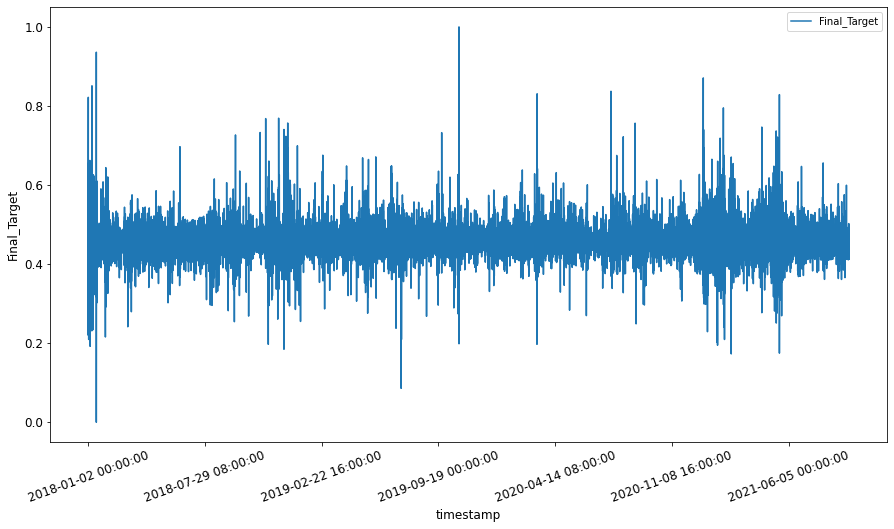

In [3]:
#visualization of the final target 
df.plot(y='Final_Target', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('Final_Target', fontsize=12)
plt.xticks(rotation=20)
plt.show()

In [4]:
# univariate data: Final_target vs Time

uni_data_df = df['Final_Target']
uni_data_df.head()
uni_data_df.shape

(130370,)

In [5]:
uni_data_df.shape

(130370,)

In [6]:
#splitting the data into 70-30
train_start_dt = '2018-01-02'
test_start_dt = '2020-08-11'

## Data visualisation of train and test 

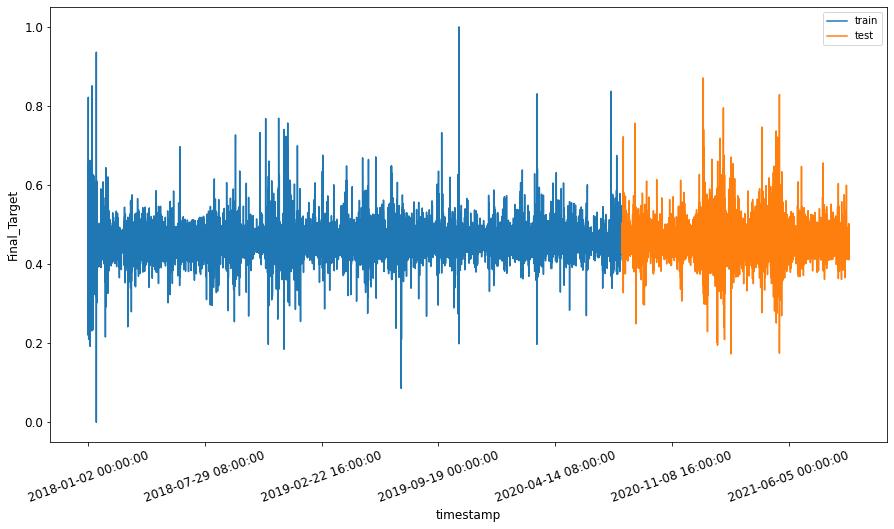

In [7]:
#data visualisation of train and test 
df[(df.index < test_start_dt) & (df.index >= train_start_dt)][['Final_Target']].rename(columns={'Final_Target':'train'}) \
    .join(df[test_start_dt:][['Final_Target']].rename(columns={'Final_Target':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('Final_Target', fontsize=12)
plt.xticks(rotation=20)
plt.show()

In [8]:
train = df.copy()[(df.index >= train_start_dt) & (df.index < test_start_dt)][['Final_Target']]
test = df.copy()[df.index >= test_start_dt][['Final_Target']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (91392, 1)
Test data shape:  (38978, 1)


In [9]:
train.head(10)

,Final_Target
timestamp,
2018-01-02 00:00:00,0.546330
2018-01-02 00:15:00,0.550354
2018-01-02 00:30:00,0.635160
2018-01-02 00:45:00,0.532988
2018-01-02 01:00:00,0.566638
2018-01-02 01:15:00,0.573950
2018-01-02 01:30:00,0.734319
2018-01-02 01:45:00,0.751294
2018-01-02 02:00:00,0.683291


In [10]:
test.shape

(38978, 1)

In [11]:
test.head(10)

,Final_Target
timestamp,
2020-08-11 00:00:00,0.427689
2020-08-11 00:15:00,0.461544
2020-08-11 00:30:00,0.441716
2020-08-11 00:45:00,0.467855
2020-08-11 01:00:00,0.462050
2020-08-11 01:15:00,0.479041
2020-08-11 01:30:00,0.458920
2020-08-11 01:45:00,0.444222
2020-08-11 02:00:00,0.466103


In [12]:
# Converting to numpy arrays
train_data = train.values
test_data = test.values

In [13]:
#using the previous past 4 time steps to predict the next time step i.e 5th min target value
timesteps=5

In [14]:
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape

(91388, 5)

In [15]:
train_data_timesteps

array([[0.54632988, 0.55035361, 0.63515959, 0.53298773, 0.56663839],
       [0.55035361, 0.63515959, 0.53298773, 0.56663839, 0.57395036],
       [0.63515959, 0.53298773, 0.56663839, 0.57395036, 0.73431893],
       ...,
       [0.46315553, 0.45774441, 0.45223693, 0.45438962, 0.44349477],
       [0.45774441, 0.45223693, 0.45438962, 0.44349477, 0.44573861],
       [0.45223693, 0.45438962, 0.44349477, 0.44573861, 0.4606606 ]])

In [16]:
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(38974, 5)

In [17]:
test_data_timesteps

array([[0.42768886, 0.46154377, 0.44171578, 0.46785507, 0.4620502 ],
       [0.46154377, 0.44171578, 0.46785507, 0.4620502 , 0.47904068],
       [0.44171578, 0.46785507, 0.4620502 , 0.47904068, 0.45891978],
       ...,
       [0.41220745, 0.45940606, 0.49019406, 0.45569509, 0.4476771 ],
       [0.45940606, 0.49019406, 0.45569509, 0.4476771 , 0.45339031],
       [0.49019406, 0.45569509, 0.4476771 , 0.45339031, 0.45339031]])

In [18]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(91388, 4) (91388, 1)
(38974, 4) (38974, 1)


In [19]:
x_train,y_train

(array([[0.54632988, 0.55035361, 0.63515959, 0.53298773],
        [0.55035361, 0.63515959, 0.53298773, 0.56663839],
        [0.63515959, 0.53298773, 0.56663839, 0.57395036],
        ...,
        [0.46315553, 0.45774441, 0.45223693, 0.45438962],
        [0.45774441, 0.45223693, 0.45438962, 0.44349477],
        [0.45223693, 0.45438962, 0.44349477, 0.44573861]]),
 array([[0.56663839],
        [0.57395036],
        [0.73431893],
        ...,
        [0.44349477],
        [0.44573861],
        [0.4606606 ]]))

In [20]:
x_test, y_test

(array([[0.42768886, 0.46154377, 0.44171578, 0.46785507],
        [0.46154377, 0.44171578, 0.46785507, 0.4620502 ],
        [0.44171578, 0.46785507, 0.4620502 , 0.47904068],
        ...,
        [0.41220745, 0.45940606, 0.49019406, 0.45569509],
        [0.45940606, 0.49019406, 0.45569509, 0.4476771 ],
        [0.49019406, 0.45569509, 0.4476771 , 0.45339031]]),
 array([[0.4620502 ],
        [0.47904068],
        [0.45891978],
        ...,
        [0.4476771 ],
        [0.45339031],
        [0.45339031]]))

In [21]:
model = LinearRegression().fit(x_train,y_train)

In [22]:
model.fit(x_train, y_train[:,0])

LinearRegression()

In [23]:
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(91388, 1) (38974, 1)


In [24]:
train_timestamps = df[(df.index < test_start_dt) & (df.index >= train_start_dt)].index[timesteps-1:]
test_timestamps = df[test_start_dt:].index[timesteps-1:]

print(len(train_timestamps), len(test_timestamps))

91388 38974


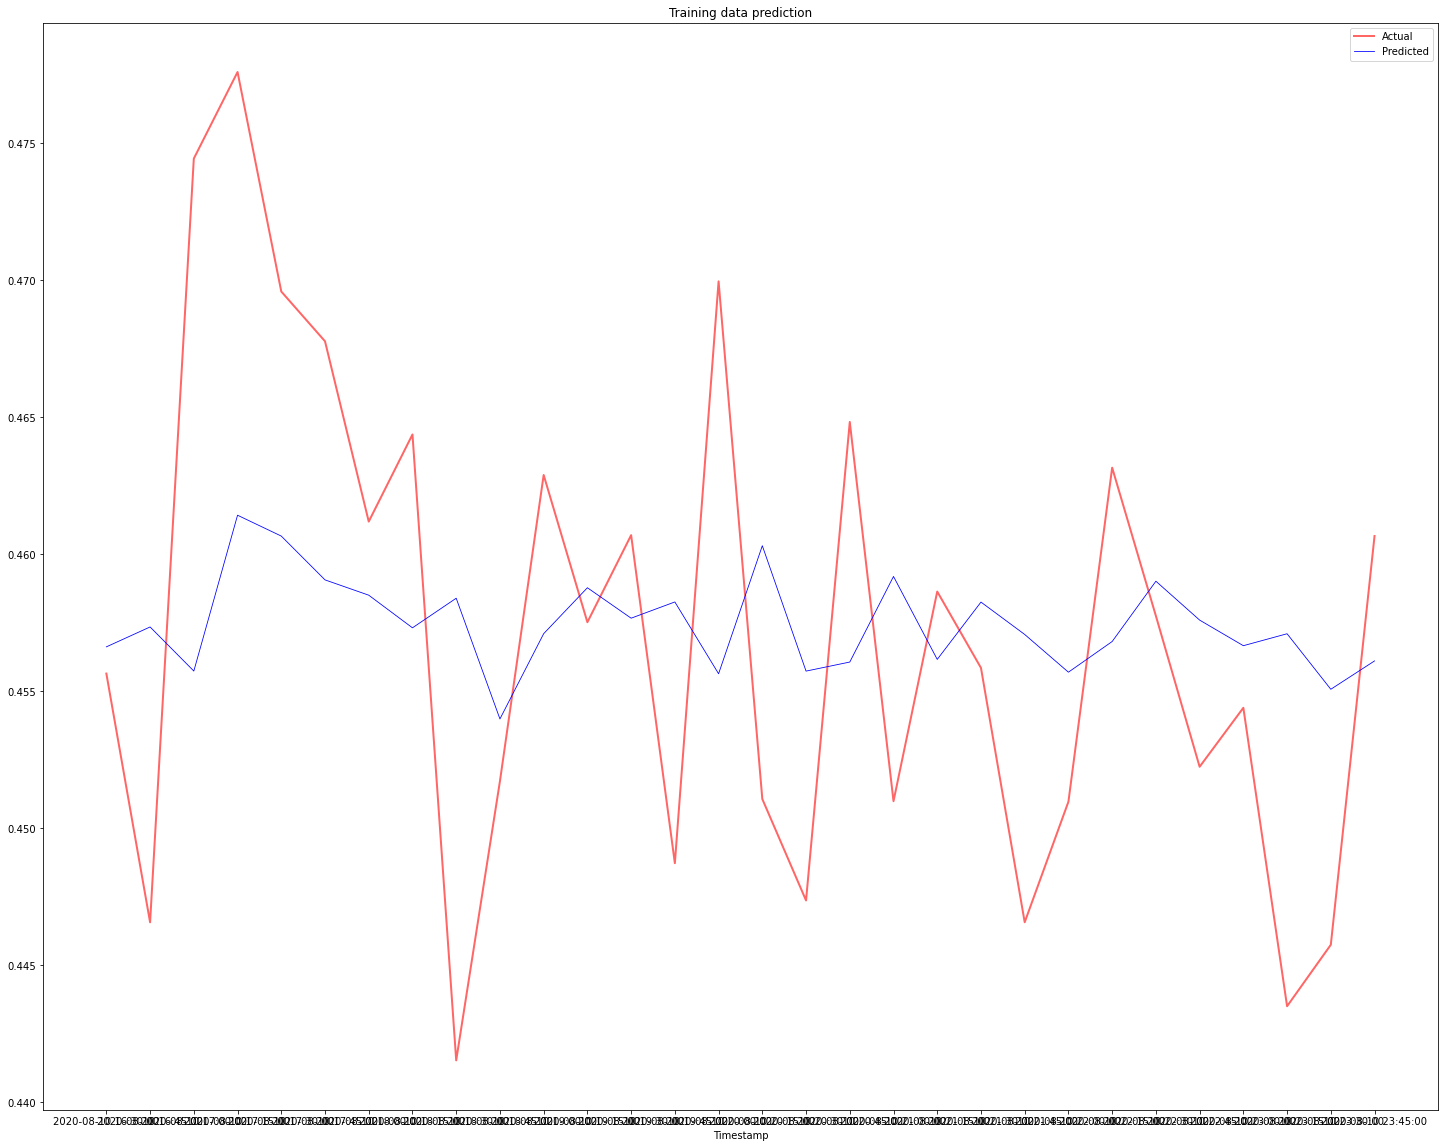

In [25]:
#Visulising the actual vs predicted for the last 30 values in the TRAIN data
plt.figure(figsize=(25,20))
plt.plot(train_timestamps[-30:], y_train[-30:], color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps[-30:], y_train_pred[-30:], color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

In [26]:
#https://www.codegrepper.com/code-examples/python/mean+absolute+percentage+error+in+python
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error1(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [27]:
#test MAPE 
mean_absolute_percentage_error1(y_test,y_test_pred)

3.656301014527356

In [28]:
#TRAIN MAPE 
mean_absolute_percentage_error1(y_train,y_train_pred)

2.9673413773536534

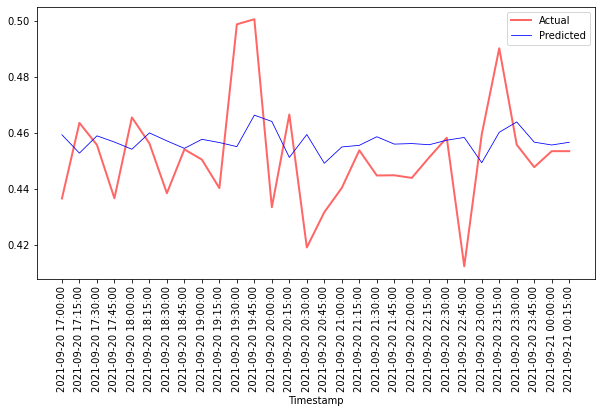

In [30]:
#Visulising the actual vs predicted for the last 30 values in the TEST data
plt.figure(figsize=(10,5))
plt.plot(test_timestamps[-30:], y_test[-30:], color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps[-30:], y_test_pred[-30:], color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.xticks(rotation=90)
plt.show()

In [31]:
mse = mean_squared_error(y_test, y_test_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

MSE: 0.0006549158789883147
RMSE: 0.025591324291413968


In [32]:
mse = mean_squared_error(y_train, y_train_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

MSE: 0.0004487578940282642
RMSE: 0.0211839064864879


The train MAPE is 2.967 and Test MAPE is 3.656